<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Moments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skew, Kurtosis, and moment matching

In a previous video, we defined Skew and Kurtosis.  This video will explore them in a bit more detail.



## Centralized Distributions

We have already observed that $X$ is a random variable, we can alter the mean and variance of $X$ without altering the shape of the distribution via a shift and scale transformation:

$$ Y = \eta X + \xi$$ 

We know that

$\mathrm{E}[Y] = \eta \mathrm{E}[X] + \xi$ 

and

$ \mathrm{Var}(Y) = \eta^2 \mathrm{Var}(X)$ 

Since these distributions are effectively the "same" (save for location and scale), it is convenient to standardize them so that $\mu_X = 0$ and $\sigma^2_X = 1$.  

We can then "dial" the mean and variance via a location and scale transform.

That is, if $X$ is a random variable, we define the standardized version of $X$ as

$\tilde{X} = \frac{X-\mu_X}{\sigma_X}$



Once we do so, we can define Skew and Kurtosis as the third and fourth moments.



$\mathrm{Skew}(X) \triangleq \mathrm{E}[\tilde{X}^3]$

$\mathrm{Kurt}(X) \triangleq \mathrm{E}[\tilde{X}^4]$



### Comment

This does **not** mean that the base versions of a PDF in scipy.stats is "standardized".  For example, the "base" lognormal distribution has neither a mean of zero nor a variance of one.





## Moments

Here we use the notation $M_n(X) = \mathrm{E}(X^n)$ to denote the nth moment of $X$. 



If we expand out the the expressions $\mathrm{E}[\tilde{X}^3]$ and $\mathrm{E}[\tilde{X}^4]$, we see that

$$\mathrm{Skew}(X) = \frac{1}{\sigma_X^3}\left(M_3(X) - 3\sigma_X^2\mu_X - \mu_X^3\right)\\
  $$
  
and

$$\mathrm{Kurt}(X)= \frac{1}{\sigma_X^4}\left( M_4(X) - 4M_3(X)\mu_X + 6\sigma_X^2\mu_X^2 + 3\mu_X^4\right)$$


Observing also that 

$$\mathrm{Var}(X) = \sigma_X^2 = M_2(X) - M_1(X)^2$$
$$\mathrm{E}(X) = \mu_X = M_1(X)$$

we conclude that if we know the first four moments, we also know the mean, variance, skew and kurtosis. 


It's not hard to see that this can be reversed:  If we know the mean, variance, skew and kurtosis, then we know the first four moments.


As a result, the parameter estimation strategy of "matching moments" is often used interchangably with the strategy of matching mean, variance, skew and kurtosis.  

Of course, when there are fewer than $4$ parameters, one does not match all four moments. 


#### Example

We generate a data set of $50$ points from the  gamma distribution with $\alpha = 1.5$ and $\beta = 20$.  We will then fit the following distributions via moment matching:

1. Normal
2. Log-normal
3. Student T
4. Exponential
5. Gamma.


**Solution**

We first generate the data, and for fun, we compare the histogram with the actual PDF.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

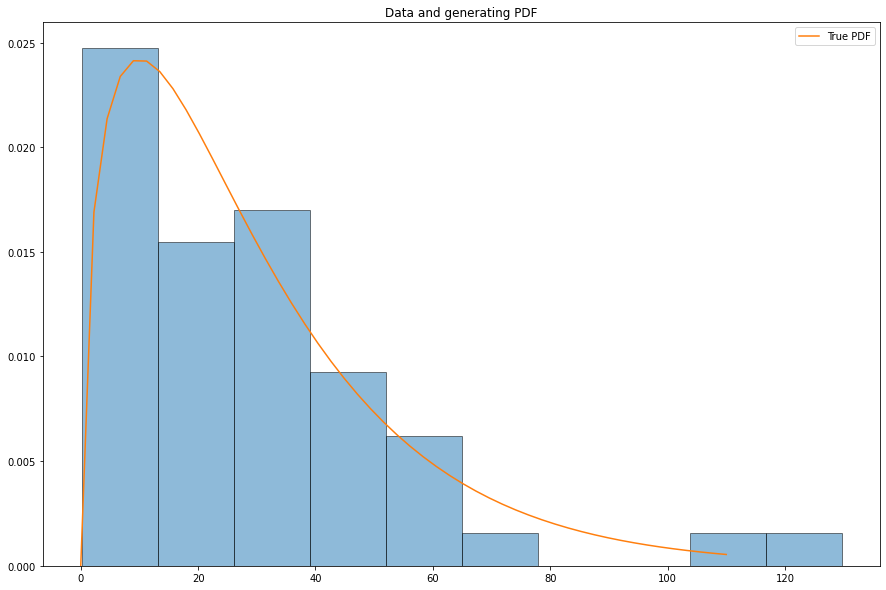

In [ ]:
sampledat = ss.gamma.rvs(a = 1.5, scale = 20, size = 50, random_state = 22)

x = np.linspace(0,110)

plt.figure(figsize = (15,10))

plt.hist(sampledat, alpha =.5, edgecolor = "black", density = True)

plt.plot(x, ss.gamma.pdf(x, a = 1.5, scale = 20), label= "True PDF")
plt.legend()

plt.title("Data and generating PDF")


plt.show()

#### Fit to Normal

We simply calculate the mean and variance of the sample.  Note, for the variance of the sample, we will divide by $N$ (not $N-1$). Since the sample size is $50$, this won't matter all that much.

In [ ]:
mean_est = sampledat.mean()
sigma_est = sampledat.std()

print("The mu estimate is ", mean_est)
print("The sigma estimate is ",sigma_est)


The mu estimate is  30.216511628907526
The sigma estimate is  24.803249153940584


Now we plot

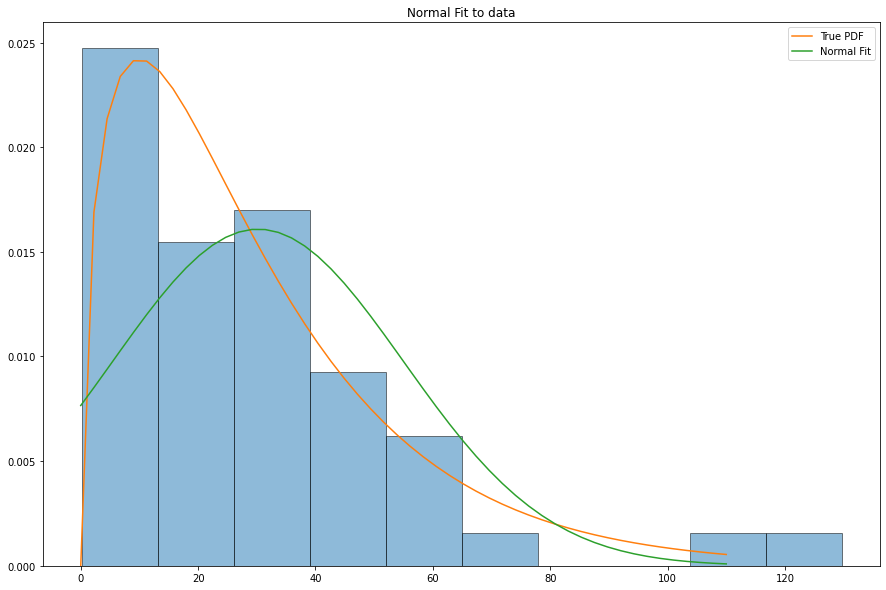

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(sampledat, alpha =.5, edgecolor = "black", density = True)

plt.plot(x, ss.gamma.pdf(x, a = 1.5, scale = 20), label= "True PDF")

plt.plot(x, ss.norm.pdf(x, loc = mean_est, scale = sigma_est), label= "Normal Fit")


plt.legend()

plt.title("Normal Fit to data")


plt.show()

#### Fit to Lognormal

For the lognormal disribution, we have:

$$\mathrm{E}[X] = e^{\mu + \frac{\sigma^2}{2}}$$

and

$$\mathrm{Var}(X) = \left(e^{\sigma^2} -1\right)e^{2\mu + \sigma^2}$$

And we can see that 

$$M_2(X) = e^{2\mu + 2 \sigma^2}$$

So for our estimates, we take the sample first and second moments (denoting them $m_1$ and $m_2$) and solve the system:

$$m_1 = e^{\mu + \frac{\sigma^2}{2}}\\
m_2 = e^{2\mu + 2 \sigma^2}$$


OR

$$\ln(m_1) = \mu + \frac{\sigma^2}{2}\\
\ln(m_2) = 2\mu + 2 \sigma^2$$

So we use a linear algebra by solving $Ax = b$ with

$$A = \begin{bmatrix} 1 & \frac{1}{2}\\ 2 & 2 \\ \end{bmatrix}$$


$$b = \begin{bmatrix} \ln(m_1) \\ \ln(m_2) \\ \end{bmatrix}$$

$$x =  \begin{bmatrix} \mu \\ \sigma^2 \\ \end{bmatrix}$$


In [ ]:
A = np.array([[1,.5], [2, 2]])

m1 = sampledat.mean()
m2 = np.mean(sampledat**2)

b = np.log(np.array([m1,m2]))

In [ ]:
LNparams = np.linalg.inv(A)@b

print(LNparams)

[3.15084143 0.51509417]


Let's go ahead and plot:



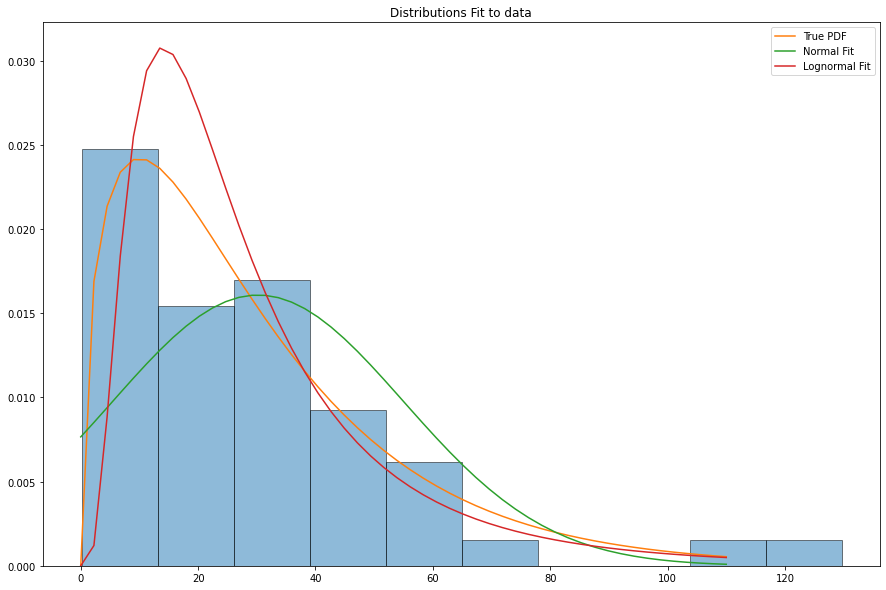

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(sampledat, alpha =.5, edgecolor = "black", density = True)

plt.plot(x, ss.gamma.pdf(x, a = 1.5, scale = 20), label= "True PDF")

plt.plot(x, ss.norm.pdf(x, loc = mean_est, scale = sigma_est), label= "Normal Fit")

plt.plot(x, ss.lognorm.pdf(x, s = np.sqrt(LNparams[1]), scale = np.exp(LNparams[0])), label = "Lognormal Fit")


plt.legend()

plt.title("Distributions Fit to data")


plt.show()

#### Student T fit.

The student T has three parameters ($\nu$ plus location and scale), meaning we will match 3 moments.  However, since the skew is zero, we will match the kurtosis.


Recall that for the $T$ distribution, $kurt = 3 + \frac{6}{\nu - 4}$

So we first calculate the excess kurtosis and set it equal to $\frac{6}{\nu - 4}$ 

Or

$\nu = \frac{6}{\mathrm{Ekurt}} + 4$


In [ ]:
Ekurt = ss.kurtosis(sampledat)  # the default is excess kurtosis

nu_est = 6/Ekurt + 4

print("The estimates df for the student T is ", nu_est)

The estimates df for the student T is  5.377414417914927


Next we note that the variance will be $\mathrm{Var}(X) = \eta^2 \frac{\nu}{\nu -2}$

Where is $\eta^2$ is the scale parameter.  

Hence we estimate the scale parameter via 

$\eta_{est} = \sqrt{\frac{\nu-2}{\nu}} \sigma_{est}$

where $\sigma_{est}$ is the the standard deviation of the sample.




In [ ]:
eta_est = np.sqrt((nu_est -2)/nu_est) * sigma_est
print("The T dist scale parameter estimate is ", eta_est)

The T dist scale parameter estimate is  19.656853400899458


The location estimate is the same as for the normal distribution, so we plot

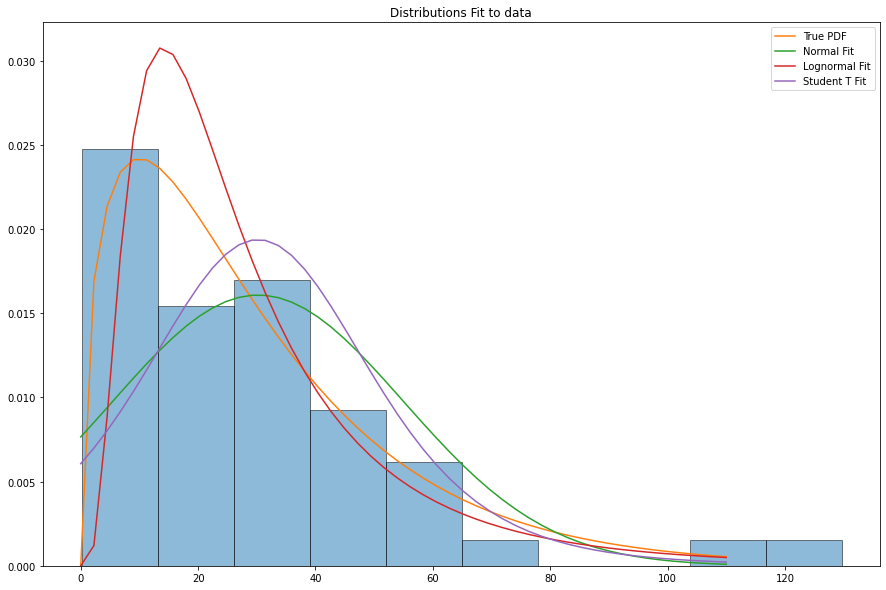

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(sampledat, alpha =.5, edgecolor = "black", density = True)

plt.plot(x, ss.gamma.pdf(x, a = 1.5, scale = 20), label= "True PDF")

plt.plot(x, ss.norm.pdf(x, loc = mean_est, scale = sigma_est), label= "Normal Fit")

plt.plot(x, ss.lognorm.pdf(x, s = np.sqrt(LNparams[1]), scale = np.exp(LNparams[0])), label = "Lognormal Fit")

plt.plot(x, ss.t.pdf(x, df = nu_est,loc = mean_est, scale = eta_est), label= "Student T Fit")


plt.legend()

plt.title("Distributions Fit to data")


plt.show()

#### Exponential Fit

In this case, there is just one paramater $\lambda$ and $\mu_X = \frac{1}{\lambda}$  So we simply take that.

In scipy.stats, the scale parameter is $\frac{1}{\lambda}$ which is the same as the mean.



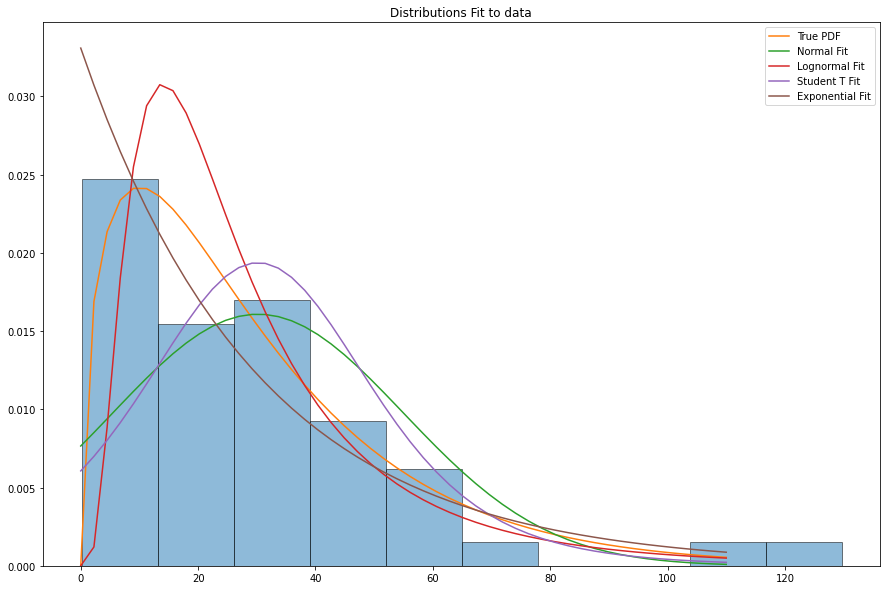

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(sampledat, alpha =.5, edgecolor = "black", density = True)

plt.plot(x, ss.gamma.pdf(x, a = 1.5, scale = 20), label= "True PDF")

plt.plot(x, ss.norm.pdf(x, loc = mean_est, scale = sigma_est), label= "Normal Fit")

plt.plot(x, ss.lognorm.pdf(x, s = np.sqrt(LNparams[1]), scale = np.exp(LNparams[0])), label = "Lognormal Fit")

plt.plot(x, ss.t.pdf(x, df = nu_est,loc = mean_est, scale = eta_est), label= "Student T Fit")

plt.plot(x, ss.expon.pdf(x, scale = mean_est), label= "Exponential Fit")



plt.legend()

plt.title("Distributions Fit to data")


plt.show()

#### Gamma Fit

We need to solve the system:

$$m_1= \alpha \beta\\
\sigma_{est}^2 = \alpha \beta^2$$

We can quickly do this via

$$\beta = \frac{\sigma_{est}^2}{m_1}$$
and
$$ \alpha = \frac{m_1^2}{\sigma^2_{est}}$$


In [ ]:
alpha_est = sampledat.mean()**2/sampledat.var()
beta_est = sampledat.var()/ sampledat.mean()

print("The estimated gamma parameters are alpha = ", alpha_est, " and beta = ", beta_est)



The estimated gamma parameters are alpha =  1.4841284796465561  and beta =  20.359768068128147


We graph one more time:



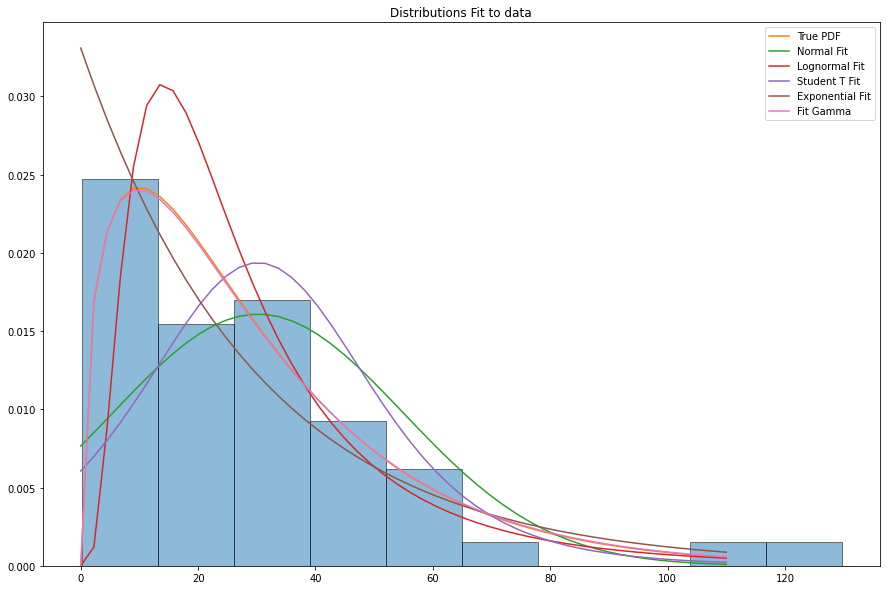

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(sampledat, alpha =.5, edgecolor = "black", density = True)

plt.plot(x, ss.gamma.pdf(x, a = 1.5, scale = 20), label= "True PDF")

plt.plot(x, ss.norm.pdf(x, loc = mean_est, scale = sigma_est), label= "Normal Fit")

plt.plot(x, ss.lognorm.pdf(x, s = np.sqrt(LNparams[1]), scale = np.exp(LNparams[0])), label = "Lognormal Fit")

plt.plot(x, ss.t.pdf(x, df = nu_est,loc = mean_est, scale = eta_est), label= "Student T Fit")

plt.plot(x, ss.expon.pdf(x, scale = mean_est), label= "Exponential Fit")

plt.plot(x, ss.gamma.pdf(x, a = alpha_est, scale = beta_est), label= "Fit Gamma")


plt.legend()

plt.title("Distributions Fit to data")

plt.show()

Not surprisingly, the Gamma fit works the best.  

### Summary

So what did we show? We first noted that is isn't any real difference between matching moment and matching things like variance, skew, kurtosis, etc.

We then showed via an example that fitting a mispecified model can be limited in value. 

However, in many cases, these distributions are quite similar.  See next video.